In [4]:
### Comprehensive check for initial data exploration
### Checking of: Nulls, Uniqueness, Categories, and Basic Statistics
### by: Chester Hansel Duco, Philippines

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read the Parquet file into a DataFrame
df = pd.read_parquet('../Data/np_216.parquet')

In [7]:
# View Data
print(df.shape)
display(df.head())

(325307, 27)


,TicketNo,fld_BranchCode,fld_RegionCode,fld_AreaCode,fld_BranchName,PrincipalAmt,LoanDate,DateCreated,ExpiryDate,TransStatus,...,fld_StorageGroupID,fld_AppraiseValue,PromoCode,PromoReason,InterestNewPrenda,fld_CustomerNo,new_PTStarRating,fld_FirstName,fld_MiddleName,fld_LastName
0,61355SG011334,61355,2B,216,CLH Calumpit Pio Cruzcosa,1000.0,2022-01-11 16:55:00,2022-01-11 16:56:00,2022-05-13,Pulled-Out,...,13,1000.00,[None],,40.00,613550043993,NaN,NENITA,FRANCISCO,ESPIRITU
1,61355SG009783,61355,2B,216,CLH Calumpit Pio Cruzcosa,3400.0,2021-05-18 09:30:00,2021-05-18 09:37:00,2021-09-17,Redeemed,...,13,4320.00,[None],,136.00,613550066718,NaN,TRISTAN JAY,OFIAZA,ROXAS
2,20112SG037342,20112,2B,216,CLH Plaridel,2934.0,2020-01-25 16:31:00,2020-01-25 16:32:00,2020-05-25,Redeemed,...,13,2934.00,[None],,117.36,201120185053,NaN,ELVIRA,G.,LIM
3,20112SG043933,20112,2B,216,CLH Plaridel,7000.0,2021-12-30 08:56:00,2021-12-30 08:57:00,2022-05-02,Redeemed,...,13,7250.00,[None],,280.00,201120373900,NaN,MA NILA,TULOP,MERABIL
4,20112SG037072,20112,2B,216,CLH Plaridel,3215.0,2020-01-10 12:29:00,2020-01-10 12:31:00,2020-05-11,Redeemed,...,13,3352.25,[None],,128.60,201120252953,NaN,ROSEMARIE,CUTLER,KATSUMATA


In [8]:
# Check for null values
def check_nulls(_df):

    print('check nulls')
    _df_out = pd.DataFrame([])
    _df_out['null_count'] = _df.isna().sum()
    _df_out['null_count_percentage'] = _df.isna().sum()/_df.shape[0]
    display(_df_out[_df_out['null_count']>0])

check_nulls(df)

check nulls


,null_count,null_count_percentage
ExpiryDate,20,0.000061
fld_ItemDescription,8,0.000025
fld_SerialNo,203869,0.626697
new_PTStarRating,125462,0.385673


In [9]:
# Check for uniqueness of non-numeric columns
def check_uniqueness_non_numeric_cols(_df):

    print('uniqueness of non-numeric columns')

    _n_cols = _df.select_dtypes(exclude=['number','datetime'])

    _arr_column,_arr_uniqueness,_arr_unique,_arr_non_unique =  [],[],[],[]
    for _col_name in _n_cols.columns:
        _col = _n_cols[_col_name]
        _arr_column += [_col_name]
        _arr_unique += [_col.nunique()]
        _arr_non_unique += [_col.count() - _col.nunique()]
        _arr_uniqueness += [_col.nunique()/_col.count()]

    _out_df = pd.DataFrame([])
    _out_df['non-numeric_column'] = _arr_column
    _out_df['unique'] = _arr_unique
    _out_df['non unique']= _arr_non_unique
    _out_df['uniqueness'] = _arr_uniqueness

    display(_out_df.sort_values('uniqueness', ascending=False))

check_uniqueness_non_numeric_cols(df)

uniqueness of non-numeric columns


,non-numeric_column,unique,non unique,uniqueness
0,TicketNo,323276,2031,0.993757
6,FormNo,322705,2602,0.992001
10,fld_ItemDescription,78985,246314,0.242807
15,fld_CustomerNo,74055,251252,0.227647
16,fld_FirstName,21243,304064,0.065301
18,fld_LastName,16588,308719,0.050992
17,fld_MiddleName,15339,309968,0.047152
14,PromoReason,2303,323004,0.007079
11,fld_SerialNo,171,121267,0.001408
8,DesignModelName,191,325116,0.000587


In [10]:
# Check contents of categorical columns
def check_count_categorical_cols(_df,_max_unique=30):

    print('rec_count per categorical columns')
    _cat_cols = _df

    for _col_name in _cat_cols.columns:
        _col = _cat_cols[_col_name]

        if _col.nunique() <= _max_unique:

            _df_out = _col.groupby(_col, dropna=False).size().sort_values(ascending=False)
            display(_df_out)

check_count_categorical_cols(df)

rec_count per categorical columns


fld_RegionCode
2B    325307
Name: fld_RegionCode, dtype: int64

fld_AreaCode
216    325307
Name: fld_AreaCode, dtype: int64

TransStatus
Redeemed      172804
Pulled-Out     36058
SOLD           23447
Renewed        22293
New Prenda     22185
Sold           21698
Pulled Out     21163
Expired         5659
Name: TransStatus, dtype: int64

fld_Karat
18K    239595
21K     48617
14K     24152
J18      5566
22K      2895
I14       831
16K       754
10K       635
PT        575
12K       574
S18       524
          262
18I       238
24K        73
S14        13
14J         3
Name: fld_Karat, dtype: int64

fld_StorageGroupID
13    317460
9       3777
7       2465
11       619
14       440
2        201
5         87
8         85
3         63
10        34
1         31
17        27
4          8
12         6
16         2
6          2
Name: fld_StorageGroupID, dtype: int64

PromoCode
[None]             173548
NPJEWEL            103170
PRD10               13752
PRD15                7618
NPPRD15              6411
NPPRD10              6377
NPPRD5               5211
PRD5                 3624
RDMCQ1               2437
CLP1                 1706
RPAWN                1233
PRD1                  113
NPPRD200               27
RRDRNW8                24
NPGADGET               20
RDM1                   10
RRDUPSIZE              10
PRD500                  7
NPNONJEWEL              5
NPJEWEL EMPDISC         4
Name: PromoCode, dtype: int64

new_PTStarRating
NaN    125462
4.0     79981
2.0     52561
5.0     33318
3.0     26717
1.0      7268
Name: new_PTStarRating, dtype: int64

In [11]:
# Check stats of numerical columns
def check_stats_num_cols(_df):

    print('check stats numerical cols')
    display(_df.describe())

check_stats_num_cols(df)

check stats numerical cols


,PrincipalAmt,fld_Weight,fld_AppraiseValue,InterestNewPrenda,new_PTStarRating
count,325307.000000,325307.000000,325307.000000,325307.000000,199845.000000
mean,9820.212469,4.104154,10608.353097,391.814153,3.397908
std,14022.875783,5.639617,15040.312375,560.536028,1.147715
min,100.000000,0.000000,0.000000,0.000000,1.000000
25%,3450.000000,1.500000,3737.500000,138.000000,2.000000
50%,5850.000000,2.500000,6325.000000,232.000000,4.000000
75%,11000.000000,4.600000,11850.000000,437.000000,4.000000
max,968000.000000,421.000000,968300.000000,38720.000000,5.000000


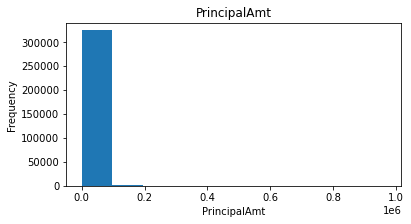

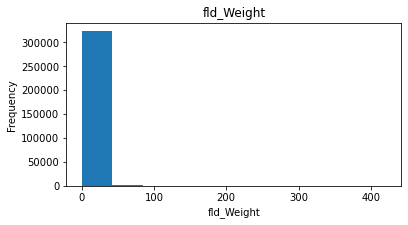

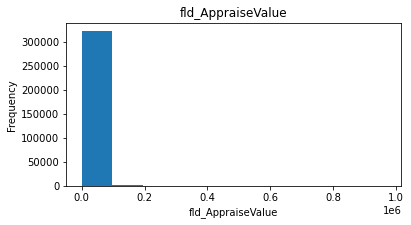

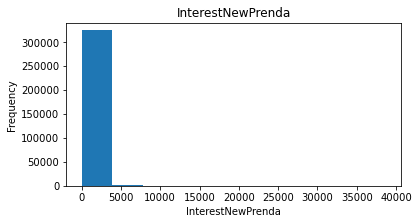

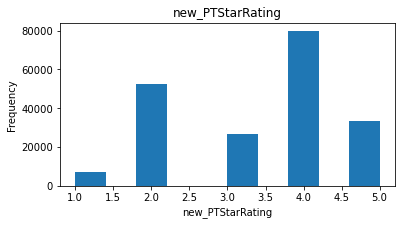

In [12]:
# check_histo_num_cols
def check_histo_num_cols(_df):

    # Select numeric columns
    numeric_cols = _df.select_dtypes(include='number')

    # Create histograms for numeric columns
    for column in numeric_cols:
        plt.figure(figsize=(6, 3))
        plt.hist(_df[column])
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

check_histo_num_cols(df)